# Импорт библиотек

Стандартные библиотеки

In [1]:
!pip install --upgrade pandas numpy

In [2]:
import pandas as pd
import numpy as np
from numpy import array, linspace, radians, degrees

Частные библиотеки

In [3]:
!pip install --upgrade git+https://github.com/ParkhomenkoDV/airfoil.git

  Cloning https://github.com/ParkhomenkoDV/airfoil.git to c:\users\parkh\appdata\local\temp\pip-req-build-sy1nlbrk
  Resolved https://github.com/ParkhomenkoDV/airfoil.git to commit 29766665d57fffbb544a0adf12f122efa826d69e
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Cloning https://github.com/ParkhomenkoDV/decorators.git (to revision master) to c:\users\parkh\appdata\local\temp\pip-install-utv78si1\decorators_b04f42702fae4f7d8d9ec785d95f8eac
  Resolved https://github.com/ParkhomenkoDV/decorators.git to commit defaf0bd8ca5d03f3e7bcb574426029427ae1e12
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Cloning https://github.com/ParkhomenkoDV/mathematics.git (to revision master) to c:\users\parkh\appdata\local\temp\pip-install-utv78si1\mathematics_3d15942414a942fc9a09814a42023b80
  Resolved https://github.com/ParkhomenkoDV/mathematics.git to commit 8e825e6f68ea7f82af71e3c67bed24

  Running command git clone --filter=blob:none --quiet https://github.com/ParkhomenkoDV/airfoil.git 'C:\Users\parkh\AppData\Local\Temp\pip-req-build-sy1nlbrk'
  Running command git clone --filter=blob:none --quiet https://github.com/ParkhomenkoDV/decorators.git 'C:\Users\parkh\AppData\Local\Temp\pip-install-utv78si1\decorators_b04f42702fae4f7d8d9ec785d95f8eac'
  Running command git clone --filter=blob:none --quiet https://github.com/ParkhomenkoDV/mathematics.git 'C:\Users\parkh\AppData\Local\Temp\pip-install-utv78si1\mathematics_3d15942414a942fc9a09814a42023b80'


In [4]:
from airfoil import Airfoil

In [5]:
Airfoil.help()

Airfoil tutorial
Airfoil.rnd = 4  # количество значащих цифр
Airfoil.vocabulary  # словарь терминов и атрибутов

airfoil = Airfoil(method, discreteness, relative_step, gamma, **attributes)  # создание объекта
где:
discreteness:  int >= 3      # количество дискретных точек
relative_step: int > 0       # относительный шаг
gamma:         float < pi/2  # угол установки профиля

methods:  # методы построения аэродинамического профиля
BMSTU
	description: 
	aliases: ('BMSTU', 'МГТУ', 'МВТУ', 'МИХАЛЬЦЕВ')
	attributes:
		rotation_angle
			description: угол поворота потока
			unit: [рад]
			type: (<class 'int'>, <class 'float'>, <class 'numpy.number'>)
			assert: (<function <lambda> at 0x000001DDD567E480>,)
		relative_inlet_radius
			description: относительный радиус входной кромки
			unit: []
			type: (<class 'float'>, <class 'numpy.floating'>)
			assert: (<function <lambda> at 0x000001DDD567F880>,)
		relative_outlet_radius
			description: относительный радиус выходной кромки
			unit: []
			typ

# Моделирование профиля 

## BMSTU

In [6]:
airfoil_bmstu = Airfoil('BMSTU', 30, 1 / 1.698, radians(46.23))

Определение характеристик профиля необходимых для построения

In [7]:
airfoil_bmstu.rotation_angle = radians(70)
airfoil_bmstu.relative_inlet_radius, airfoil_bmstu.relative_outlet_radius = 0.06, 0.03
airfoil_bmstu.inlet_angle, airfoil_bmstu.outlet_angle = radians(20), radians(10)
airfoil_bmstu.x_ray_cross = 0.4
airfoil_bmstu.upper_proximity = 0.5

Определение точек профиля

"__calculate" elapsed 0.0034 seconds
"properties" elapsed 0.711 seconds


Channel calculation: 100%|██████████| 28/28 [00:00<00:00, 217.03it/s]

"channel" elapsed 0.8512 seconds
"properties" elapsed 0.0 seconds


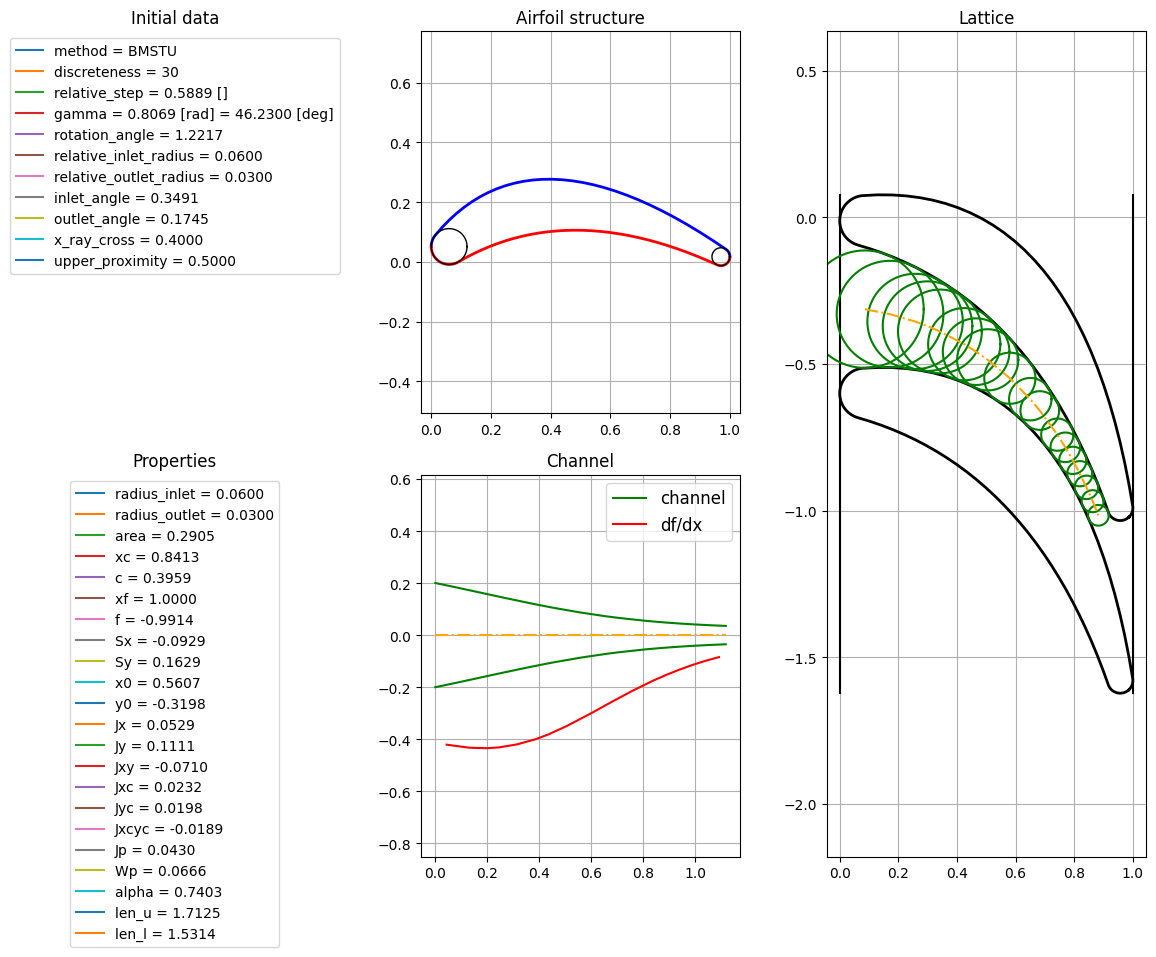

In [8]:
airfoil_bmstu.show()

In [9]:
airfoil_bmstu.properties

"properties" elapsed 0.0 seconds


{'radius_inlet': 0.06,
 'radius_outlet': 0.03,
 'area': 0.29051386874902874,
 'xc': np.float64(0.8412841284128413),
 'c': np.float64(0.39587663900959946),
 'xf': np.float64(1.0),
 'f': np.float64(-0.9914468801044789),
 'Sx': -0.09291400852028513,
 'Sy': 0.16290074676477942,
 'x0': 0.5607331156555122,
 'y0': -0.3198264128331593,
 'Jx': 0.05292396198650218,
 'Jy': 0.11113096136445706,
 'Jxy': -0.070997873013844,
 'Jxc': 0.023207607939509784,
 'Jyc': 0.019787118088432698,
 'Jxcyc': -0.018897911528221713,
 'Jp': 0.04299472602794248,
 'Wp': np.float64(0.06660363499114186),
 'alpha': np.float64(0.7402715177881605),
 'len_u': 1.7125027438580793,
 'len_l': 1.5313554003470644}

CFD: 100%|██████████| 179/179 [00:05<00:00, 32.27it/s]


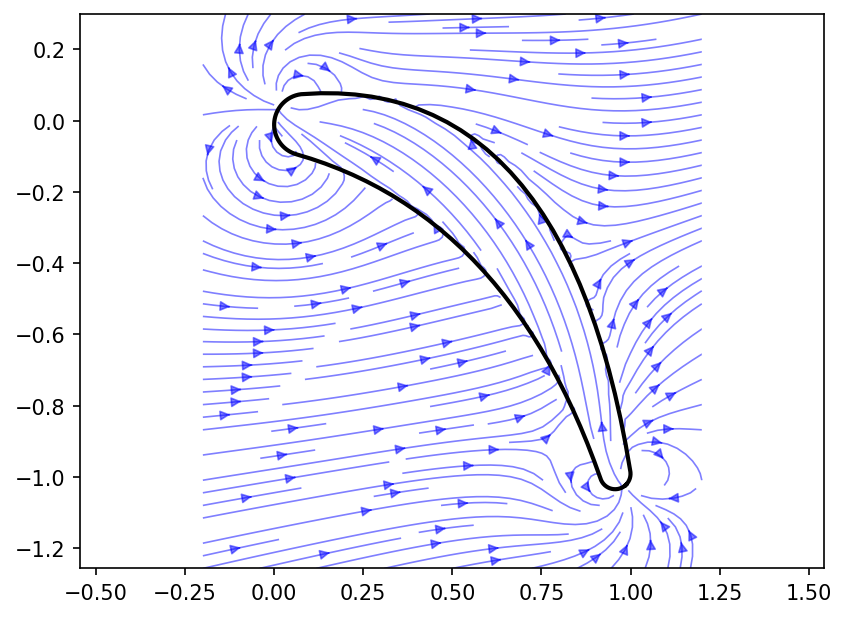

In [10]:
airfoil_bmstu.cfd(10, 5)

In [11]:
airfoil_bmstu.coordinates

((0.9866944883210124, -1.0222371516862696),
 (0.987674159588808, -1.0212682150474905),
 (0.9886224111360565, -1.0202685085875463),
 (0.9895382770373304, -1.0192390506458135),
 (0.9904208243564652, -1.0181808898676699),
 (0.9912691540968822, -1.0170951041363043),
 (0.9920824021173431, -1.0159827994747435),
 (0.9928597400121951, -1.0148451089192145),
 (0.9936003759552189, -1.0136831913649902),
 (0.9943035555062113, -1.0124982303858945),
 (0.9949685623794885, -1.0112914330286686),
 (0.9955947191735213, -1.0100640285834266),
 (0.9961813880609626, -1.0088172673314535),
 (0.9967279714383629, -1.0075524192716208),
 (0.9972339125349121, -1.0062707728267164),
 (0.9976986959795873, -1.0049736335310087),
 (0.9981218483261298, -1.0036623227003783),
 (0.9985029385353157, -1.002338176086375),
 (0.9988415784140285, -1.0010025425155713),
 (0.9991374230106888, -0.9996567825155934),
 (0.9993901709666331, -0.9983022669292382),
 (0.9995995648230912, -0.9969403755180783),
 (0.999765391283443, -0.9955724955

In [12]:
airfoil_bmstu.to_dataframe()

,x,y
0,0.986694,-1.022237
1,0.987674,-1.021268
2,0.988622,-1.020269
3,0.989538,-1.019239
4,0.990421,-1.018181
...,...,...
174,0.977525,-1.028950
175,0.979979,-1.027502
176,0.982332,-1.025896
177,0.984574,-1.024139


## NACA

In [13]:
airfoil_naca = Airfoil('NACA', 40, 1 / 1.698, radians(46.23))

Определение характеристик профиля необходимых для построения

In [14]:
airfoil_naca.relative_thickness = 0.2
airfoil_naca.x_relative_camber = 0.3
airfoil_naca.relative_camber = 0.05
airfoil_naca.closed = True

"__calculate" elapsed 0.0036 seconds
"properties" elapsed 1.5042 seconds


Channel calculation: 100%|██████████| 36/36 [00:00<00:00, 78.58it/s] 


"channel" elapsed 1.9712 seconds
"properties" elapsed 0.0 seconds


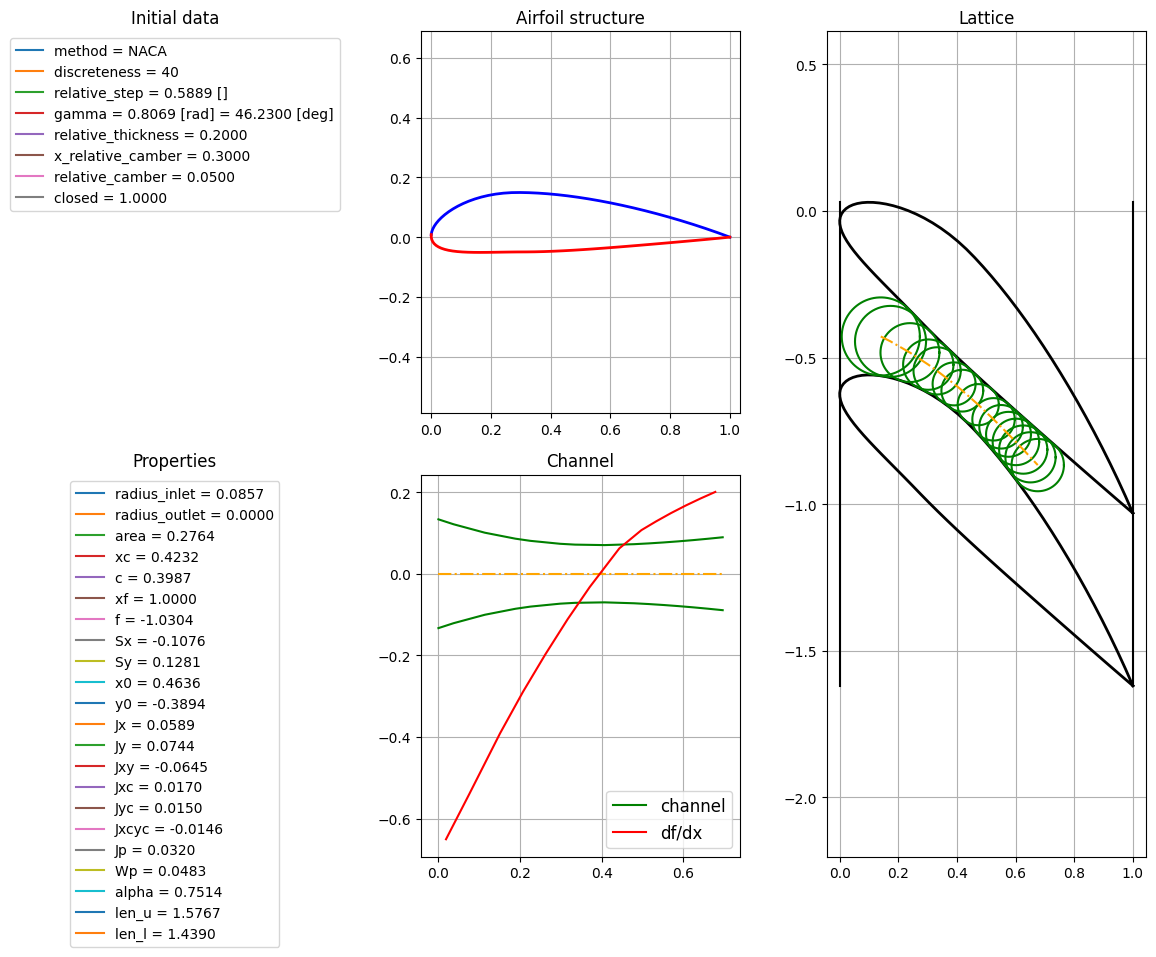

In [15]:
airfoil_naca.show()

In [16]:
airfoil_naca.properties

"properties" elapsed 0.0 seconds


{'radius_inlet': np.float64(0.08569925164000373),
 'radius_outlet': 0,
 'area': 0.27635234117268553,
 'xc': np.float64(0.42324232423242325),
 'c': np.float64(0.3986917398638531),
 'xf': np.float64(1.0),
 'f': np.float64(-1.0303733199950589),
 'Sx': -0.10761095230819542,
 'Sy': 0.12811444919347065,
 'x0': 0.4635909674216047,
 'y0': -0.38939765030234386,
 'Jx': 0.058902373446129294,
 'Jy': 0.07440026303103309,
 'Jxy': -0.06450376816299808,
 'Jxc': 0.016998921470520408,
 'Jyc': 0.015007561588746006,
 'Jxcyc': -0.014616302677281597,
 'Jp': 0.03200648305926641,
 'Wp': np.float64(0.048286434444470575),
 'alpha': np.float64(0.7513901079023984),
 'len_u': 1.5766958039720214,
 'len_l': 1.438975862369137}

CFD:   0%|          | 0/79 [00:00<?, ?it/s]

CFD: 100%|██████████| 79/79 [00:08<00:00,  9.85it/s]


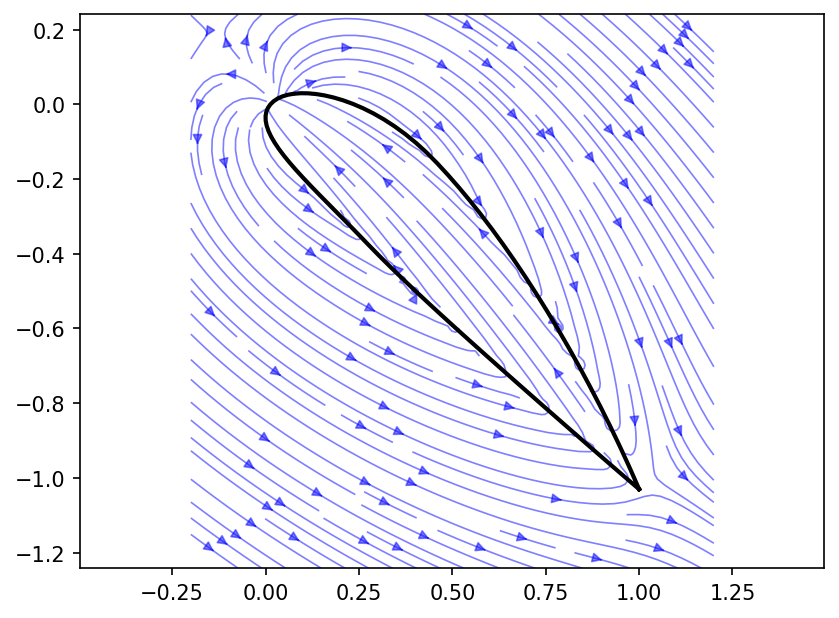

In [17]:
airfoil_naca.cfd(10,-8)

## MYNK

In [18]:
airfoil_mynk = Airfoil('MYNK', 20, 1 / 1.698, radians(46.23))

Определение характеристик профиля необходимых для построения

In [19]:
airfoil_mynk.mynk_coefficient = 0.2

"__calculate" elapsed 0.0015 seconds
"properties" elapsed 0.6869 seconds


Channel calculation: 100%|██████████| 21/21 [00:00<00:00, 269.21it/s]

"channel" elapsed 0.7678 seconds
"properties" elapsed 0.0 seconds


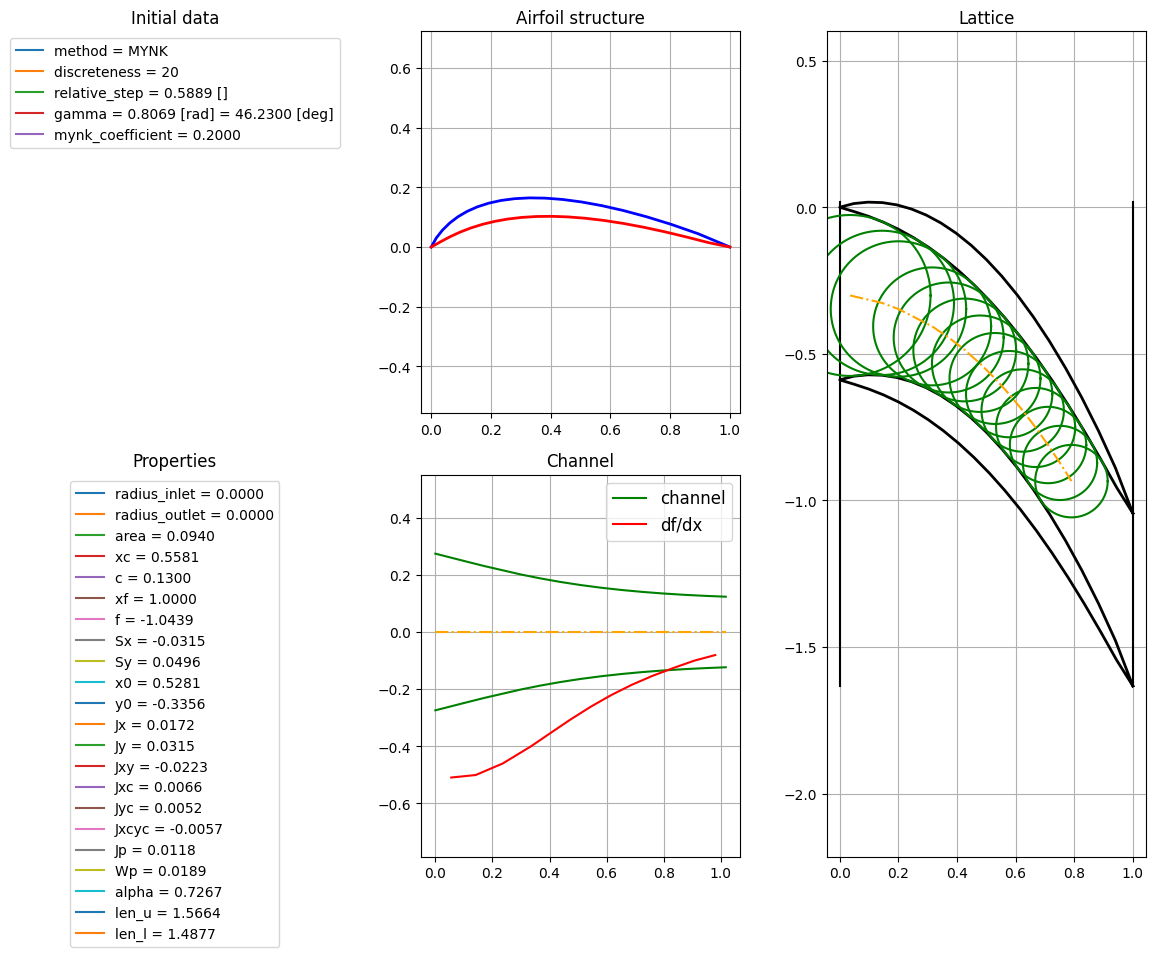

In [20]:
airfoil_mynk.show()

In [21]:
airfoil_mynk.properties

"properties" elapsed 0.0 seconds


{'radius_inlet': 0,
 'radius_outlet': 0,
 'area': 0.09396776491278673,
 'xc': np.float64(0.5580558055805581),
 'c': np.float64(0.13004347400191874),
 'xf': np.float64(1.0),
 'f': np.float64(-1.043883921460576),
 'Sx': -0.03153184882551968,
 'Sy': 0.04962244305721887,
 'x0': 0.5280794228028559,
 'y0': -0.33556027276784745,
 'Jx': 0.017160407126348316,
 'Jy': 0.031450855582253794,
 'Jxy': -0.022303424059805614,
 'Jxc': 0.006579571333582402,
 'Jyc': 0.005246264494530067,
 'Jxcyc': -0.005652103532118272,
 'Jp': 0.011825835828112469,
 'Wp': np.float64(0.018900939588121234),
 'alpha': np.float64(0.7266954573853913),
 'len_u': 1.5664389226189268,
 'len_l': 1.487745328488906}

CFD:   0%|          | 0/39 [00:00<?, ?it/s]d:\programming\projects\airfiols\airfoil\venv\Lib\site-packages\airfoil\airfoil.py:1113: RuntimeWarning: invalid value encountered in divide
  ux += -k * (Y - j) / R
d:\programming\projects\airfiols\airfoil\venv\Lib\site-packages\airfoil\airfoil.py:1114: RuntimeWarning: invalid value encountered in divide
  uy += k * (X - i) / R
CFD: 100%|██████████| 39/39 [00:00<00:00, 114.70it/s]


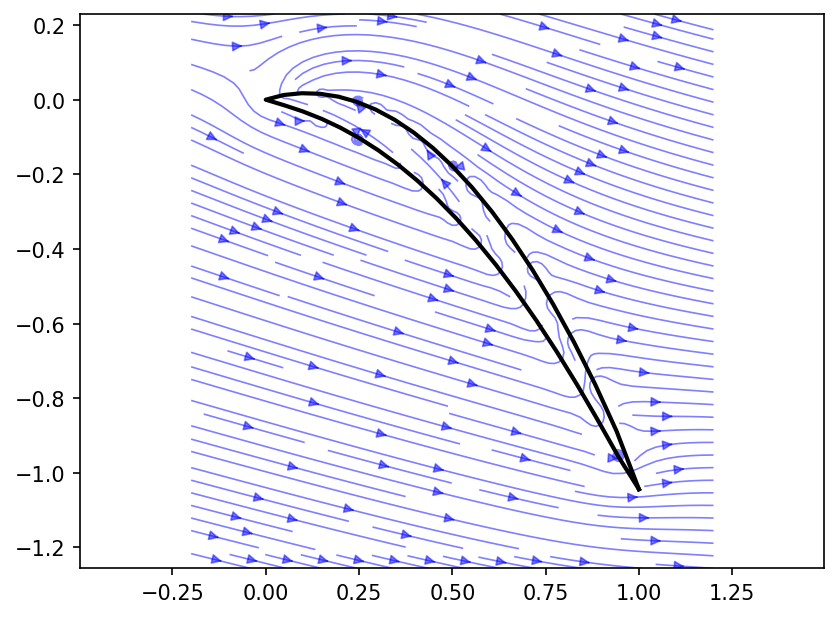

In [22]:
airfoil_mynk.cfd(10, -2)

## PARSEC

In [23]:
airfoil_parsec = Airfoil('PARSEC', 50, 1 / 1.698, radians(46.23))

Определение характеристик профиля необходимых для построения

In [24]:
airfoil_parsec.relative_inlet_radius = 0.06
airfoil_parsec.x_relative_camber_upper, airfoil_parsec.x_relative_camber_lower = 0.35, 0.45
airfoil_parsec.relative_camber_upper, airfoil_parsec.relative_camber_lower = 0.055, -0.006
airfoil_parsec.d2y_dx2_upper, airfoil_parsec.d2y_dx2_lower = -0.35, -0.2
airfoil_parsec.theta_outlet_upper, airfoil_parsec.theta_outlet_lower = radians(-6), radians(0.05)

"__calculate" elapsed 0.0022 seconds
"properties" elapsed 0.9174 seconds


Channel calculation: 100%|██████████| 52/52 [00:00<00:00, 133.68it/s]


"channel" elapsed 1.3161 seconds
"properties" elapsed 0.0 seconds


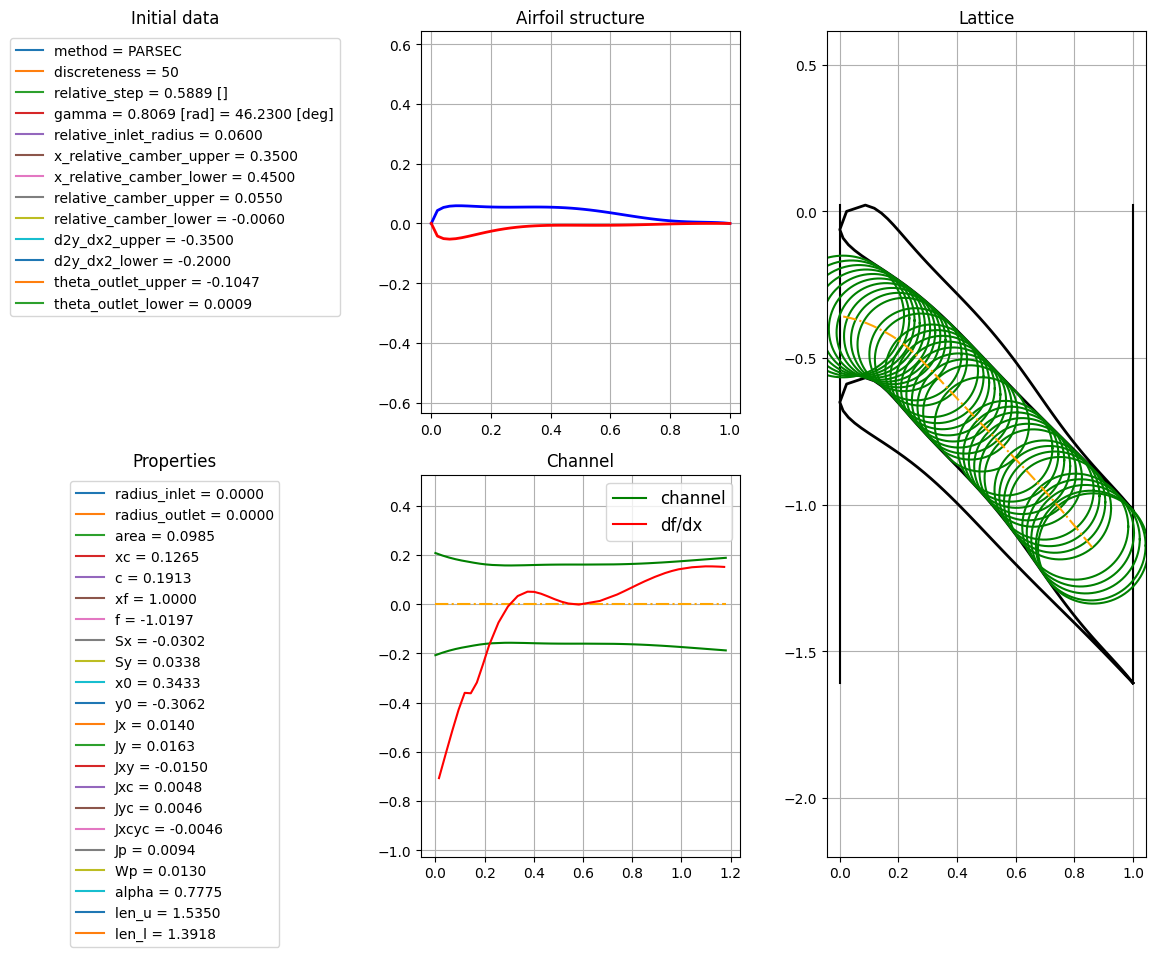

In [25]:
airfoil_parsec.show()

In [26]:
airfoil_parsec.properties

"properties" elapsed 0.0 seconds


{'radius_inlet': 0,
 'radius_outlet': 0,
 'area': 0.09846727427897439,
 'xc': np.float64(0.1265126512651265),
 'c': np.float64(0.19133259229501695),
 'xf': np.float64(1.0),
 'f': np.float64(-1.0196905265026146),
 'Sx': -0.030152832543065528,
 'Sy': 0.0338055695058471,
 'x0': 0.34331781552183743,
 'y0': -0.3062218667456709,
 'Jx': 0.01402791595445197,
 'Jy': 0.016255355690834965,
 'Jxy': -0.014968390122687653,
 'Jxc': 0.00479445928544483,
 'Jyc': 0.004649301415615897,
 'Jxcyc': -0.004616385522206626,
 'Jp': 0.009443760701060728,
 'Wp': np.float64(0.013033586771766649),
 'alpha': np.float64(0.7775377978169954),
 'len_u': 1.5350482500464164,
 'len_l': 1.3917546178683613}

CFD: 100%|██████████| 99/99 [00:21<00:00,  4.69it/s]


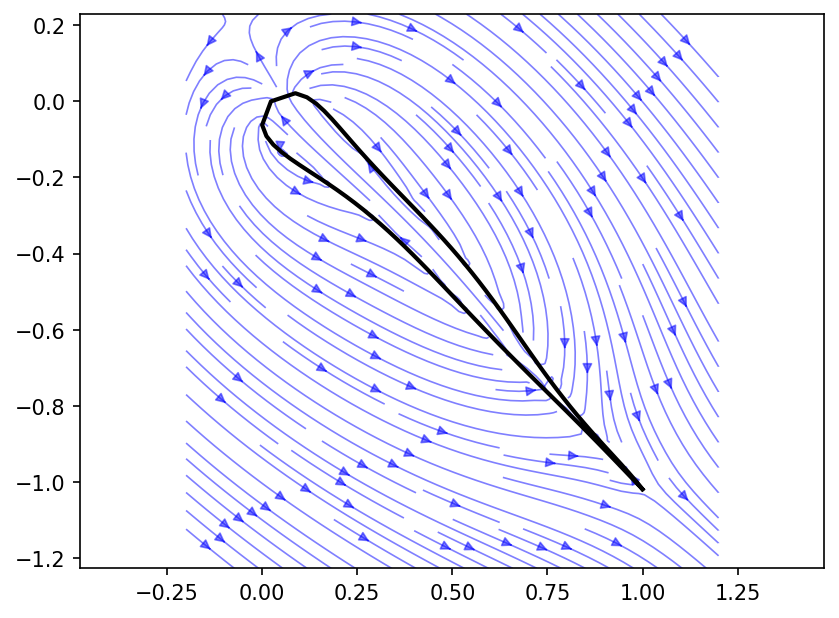

In [27]:
airfoil_parsec.cfd(5, -5)

## BEZIER

In [28]:
airfoil_bezier = Airfoil('BEZIER', 30, 1 / 1.698, radians(46.23))

Определение характеристик профиля необходимых для построения

In [29]:
airfoil_bezier.points = ((1.0, 0.0), (0.35, 0.200), (0.05, 0.100), (0.0, 0.0), (0.05, -0.10), (0.35, -0.05), (0.5, 0.0), (1.0, 0.0))

"__calculate" elapsed 0.0012 seconds
"properties" elapsed 0.5216 seconds


Channel calculation: 100%|██████████| 32/32 [00:00<00:00, 293.56it/s]

"channel" elapsed 0.6332 seconds
"properties" elapsed 0.0 seconds


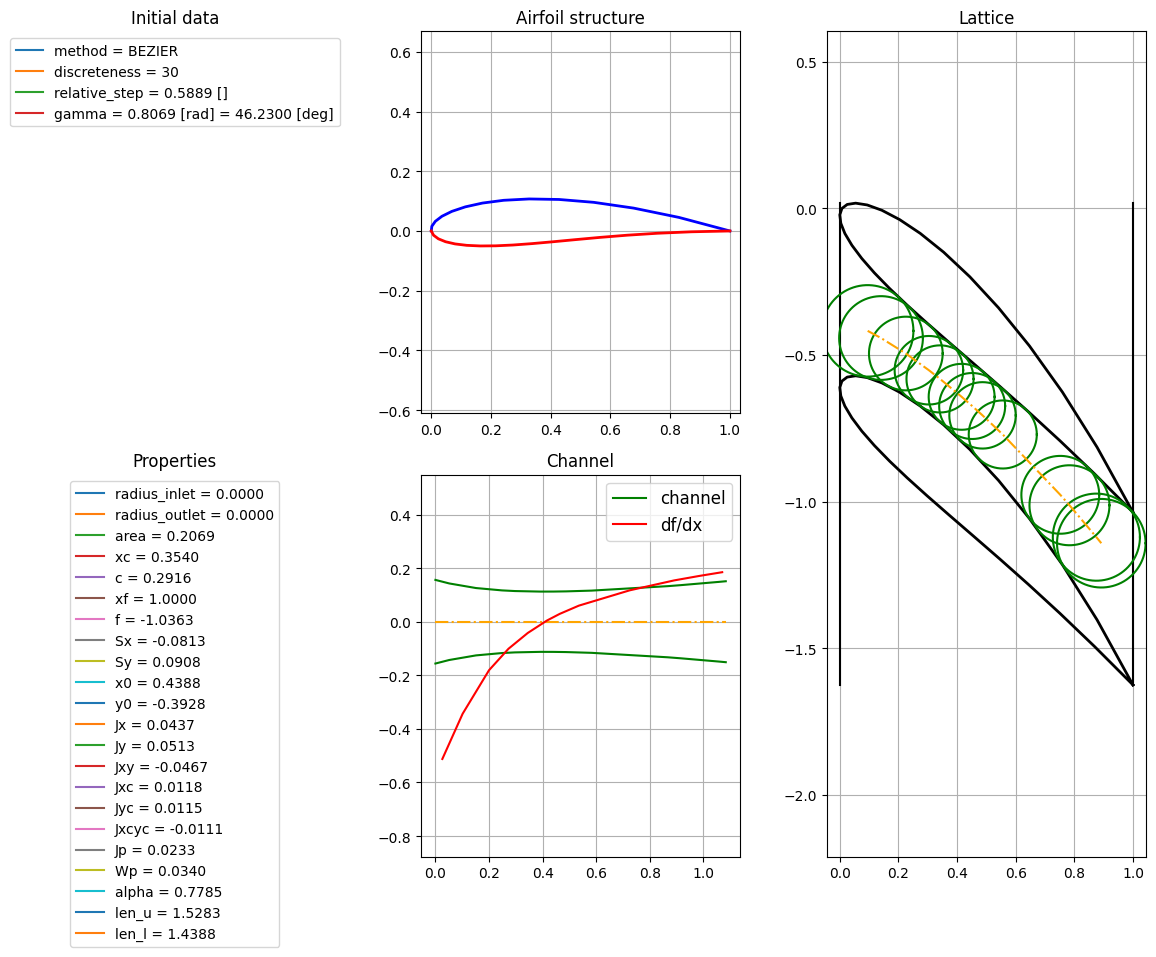

In [30]:
airfoil_bezier.show()

CFD: 100%|██████████| 30/30 [00:00<00:00, 49.10it/s]


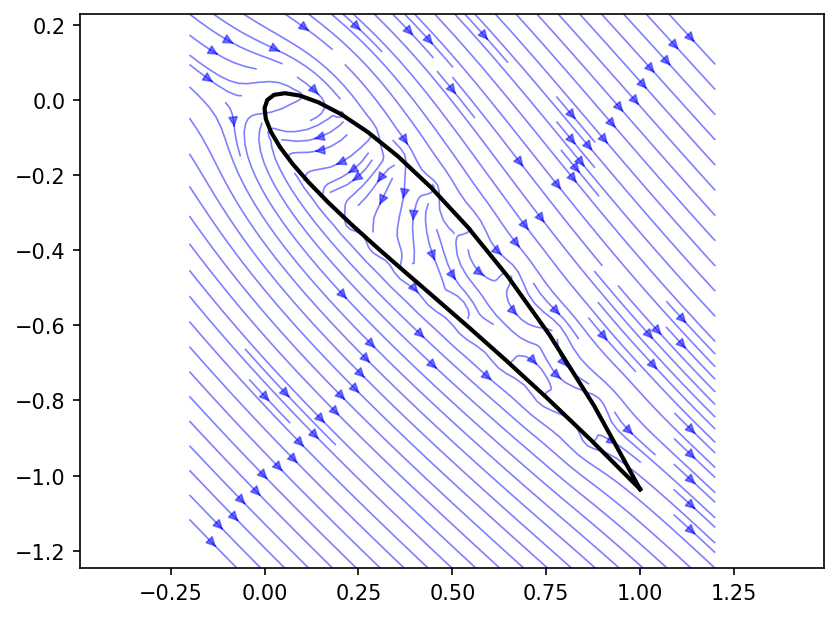

In [31]:
airfoil_bezier.cfd(20, -20)

## MANUAL

In [32]:
airfoil_manual = Airfoil('MANUAL', 30, 1 / 1.698, radians(46.23))

Определение характеристик профиля необходимых для построения

In [33]:
airfoil_manual.upper = ((0.0, 0.0), (0.05, 0.08), (0.10, 0.110), (0.35, 0.150), (0.5, 0.15), (1.0, 0.0))
airfoil_manual.lower = ((0.0, 0.0), (0.05, -0.025), (0.35, -0.025), (0.5, 0.0), (0.8, 0.025), (1.0, 0.0))
airfoil_manual.deg = 3

"__calculate" elapsed 0.0014 seconds
"properties" elapsed 0.9747 seconds


Channel calculation: 100%|██████████| 32/32 [00:00<00:00, 87.91it/s]


"channel" elapsed 1.346 seconds
"properties" elapsed 0.0 seconds


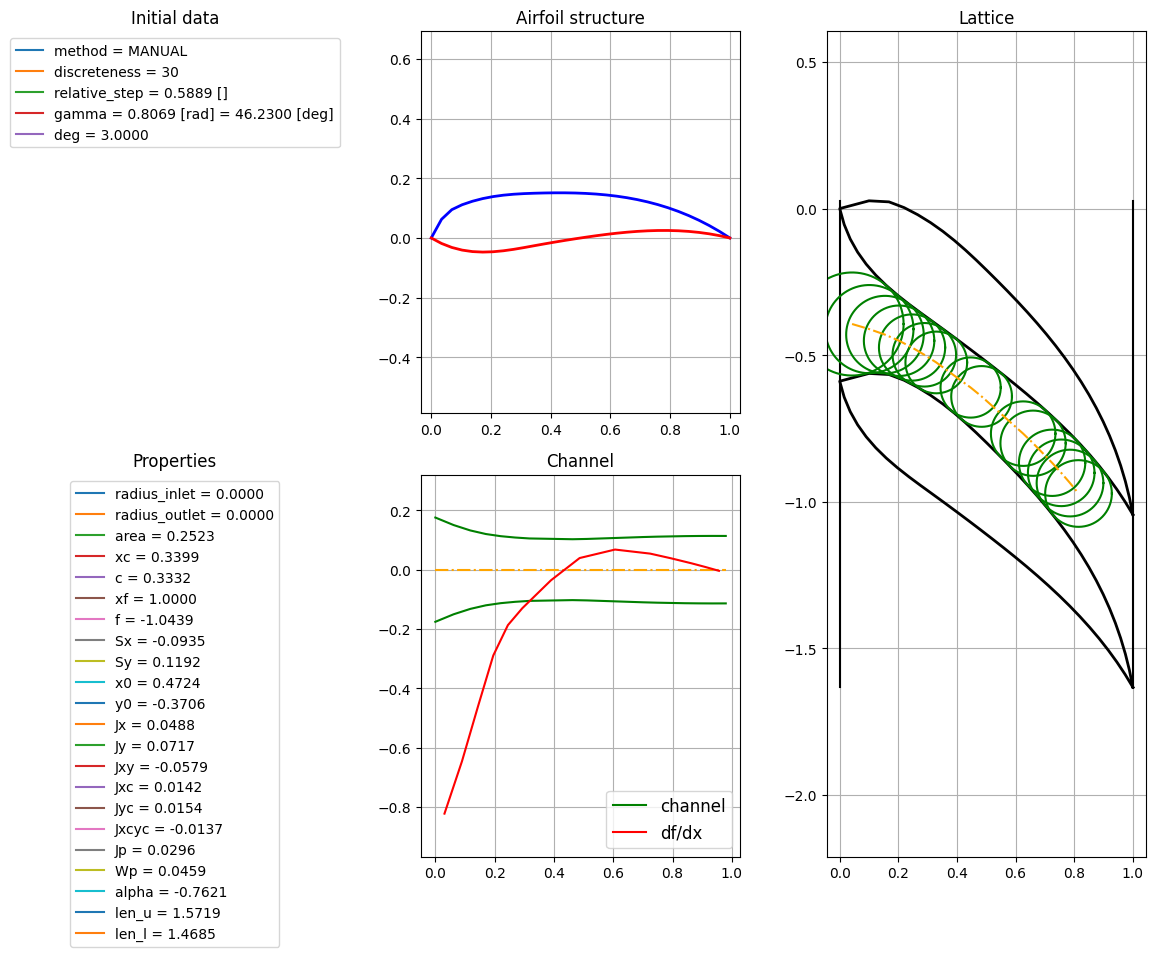

In [34]:
airfoil_manual.show()

In [35]:
airfoil_manual.properties

"properties" elapsed 0.0 seconds


{'radius_inlet': 0,
 'radius_outlet': 0,
 'area': 0.2523171282616151,
 'xc': np.float64(0.33993399339933994),
 'c': np.float64(0.3332092805793409),
 'xf': np.float64(1.0),
 'f': np.float64(-1.043883921460576),
 'Sx': -0.093518246028744,
 'Sy': 0.1191859651255799,
 'x0': 0.4723657325475022,
 'y0': -0.37063772353884583,
 'Jx': 0.04882750140657534,
 'Jy': 0.07174230856339739,
 'Jxy': -0.057883266631473446,
 'Jxc': 0.014166111589135943,
 'Jyc': 0.015442942837471794,
 'Jxcyc': -0.01370845183954824,
 'Jp': 0.029609054426607738,
 'Wp': np.float64(0.045919572581535555),
 'alpha': np.float64(-0.7621295008225728),
 'len_u': 1.5719252075271022,
 'len_l': 1.4684590883908577}

CFD: 100%|██████████| 59/59 [00:01<00:00, 36.81it/s]


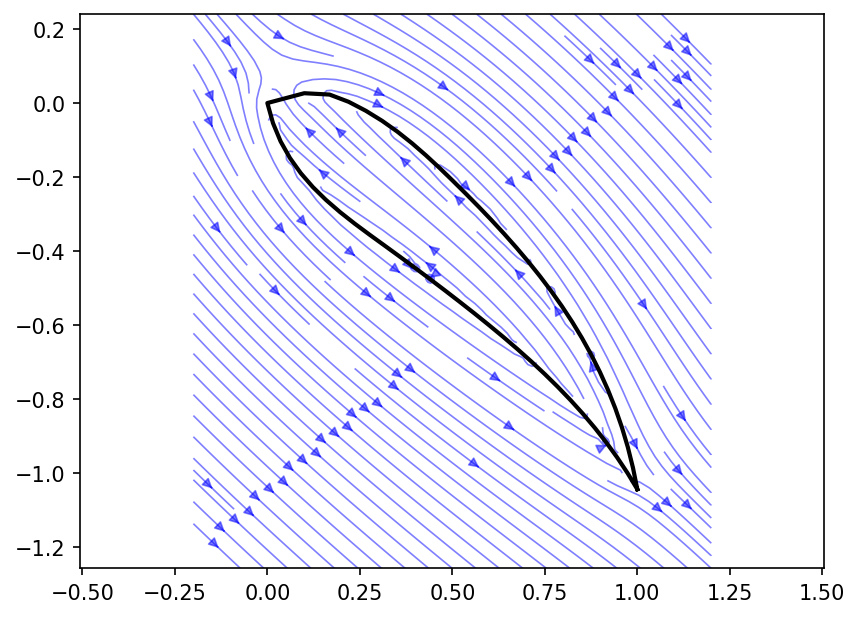

In [36]:
airfoil_manual.cfd(20, -20)

# CIRCLE (airfoil)

In [37]:
airfoil_circle_airfoil = Airfoil('CIRCLE', 60, 0.5, radians(30))

In [38]:
airfoil_circle_airfoil.relative_circles = ((0.1, 0.04),
                                         (0.2, 0.035),
                                         (0.3, 0.03),
                                         (0.4, 0.028),
                                         (0.5, 0.025),
                                         (0.6, 0.02),)
airfoil_circle_airfoil.rotation_angle = radians(40)
airfoil_circle_airfoil.x_ray_cross = 0.5
airfoil_circle_airfoil.is_airfoil = True

"__calculate" elapsed 0.0058 seconds
"properties" elapsed 0.6512 seconds


Channel calculation: 100%|██████████| 61/61 [00:00<00:00, 260.95it/s]


"channel" elapsed 0.8906 seconds
"properties" elapsed 0.0 seconds


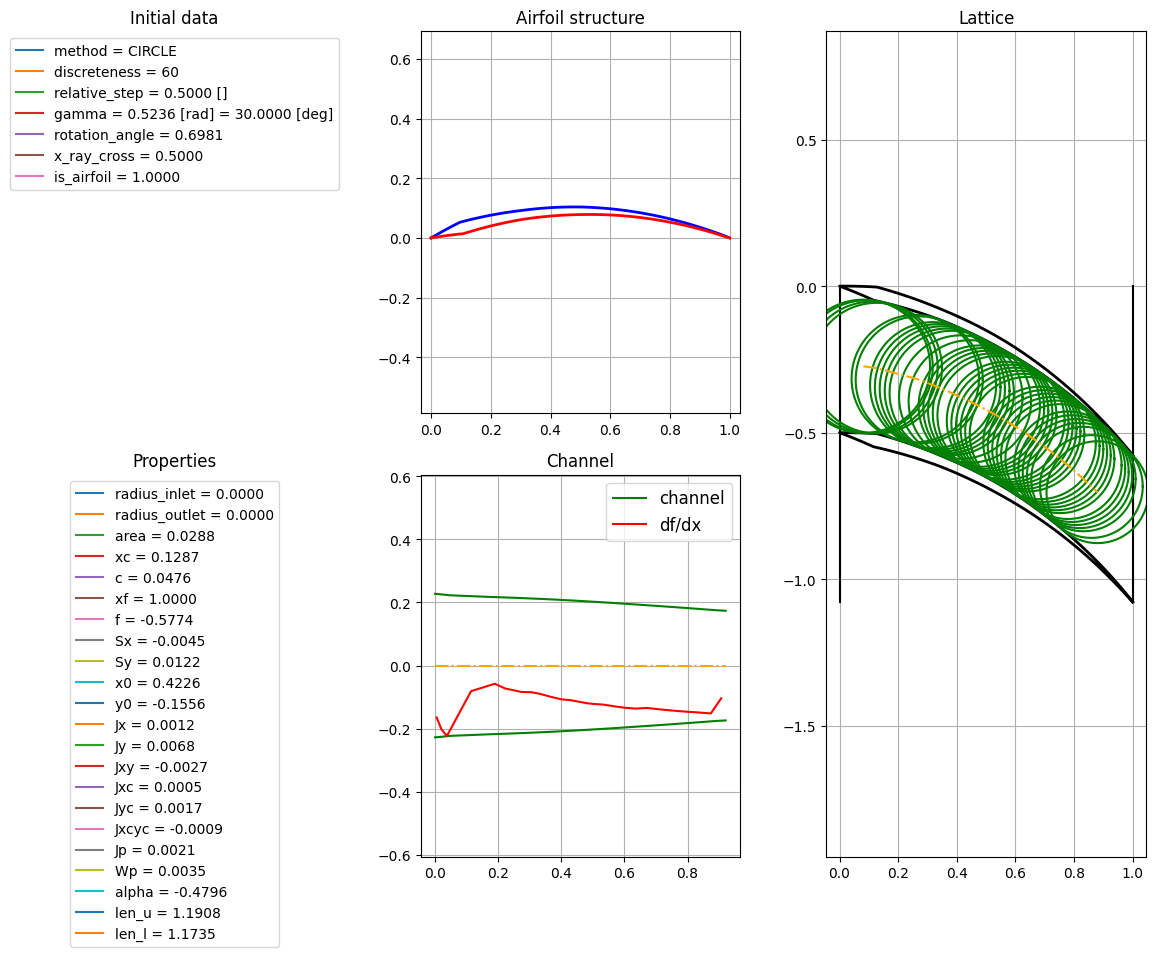

In [39]:
airfoil_circle_airfoil.show()

In [40]:
airfoil_circle_airfoil.properties

"properties" elapsed 0.0 seconds


{'radius_inlet': 0,
 'radius_outlet': 0,
 'area': 0.028819090907257736,
 'xc': np.float64(0.12871287128712872),
 'c': np.float64(0.047615830395383564),
 'xf': np.float64(1.0),
 'f': np.float64(-0.5773502691896256),
 'Sx': -0.004484374225341282,
 'Sy': 0.012180068181607474,
 'x0': 0.4226388757648172,
 'y0': -0.15560429160560188,
 'Jx': 0.0011597853224429345,
 'Jy': 0.006805797662926278,
 'Jxy': -0.0027480304133956275,
 'Jxc': 0.0004619974478142846,
 'Jyc': 0.0016580273399128742,
 'Jxcyc': -0.000852759532288665,
 'Jp': 0.0021200247877271585,
 'Wp': np.float64(0.0035454171977102188),
 'alpha': np.float64(-0.47960915526635567),
 'len_u': 1.1907604770647136,
 'len_l': 1.1735302317911693}

CFD: 100%|██████████| 123/123 [00:49<00:00,  2.49it/s]


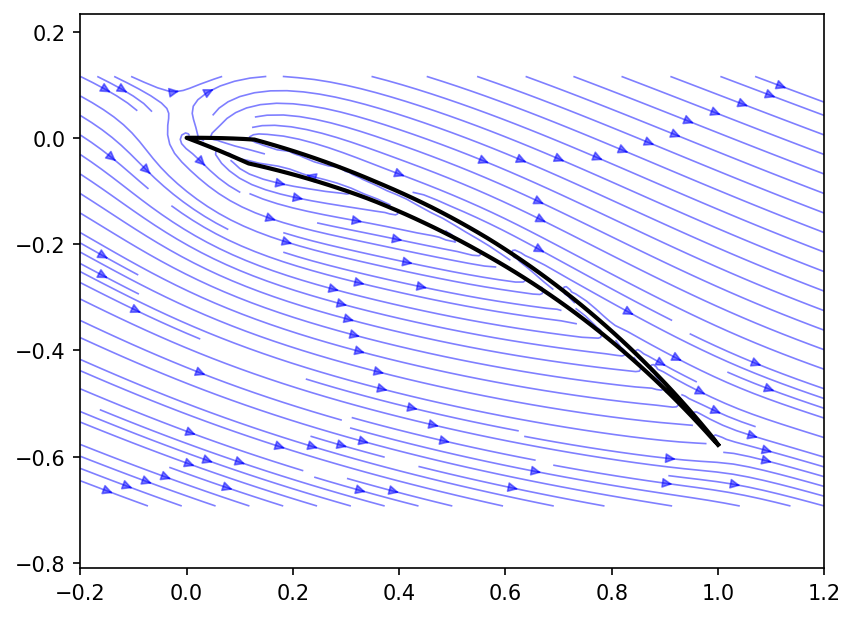

In [41]:
airfoil_circle_airfoil.cfd(15, -5)

# CIRCLE (channel)

In [42]:
airfoil_circle_channel = Airfoil('CIRCLE', 60, 0.5, radians(30))

In [43]:
airfoil_circle_channel.relative_circles = ((0.1, 0.4),
                                         (0.2, 0.4),
                                         (0.3, 0.4),
                                         (0.4, 0.4),
                                         (0.5, 0.4),
                                         (0.6, 0.4),
                                         (0.8, 0.4),
                                         (0.9, 0.4))
airfoil_circle_channel.rotation_angle = radians(40)
airfoil_circle_channel.x_ray_cross = 0.5
airfoil_circle_channel.is_airfoil = False

"__calculate" elapsed 0.005 seconds
"properties" elapsed 0.5894 seconds


Channel calculation: 100%|██████████| 61/61 [00:00<00:00, 354.64it/s]

"channel" elapsed 0.7647 seconds
"properties" elapsed 0.0 seconds


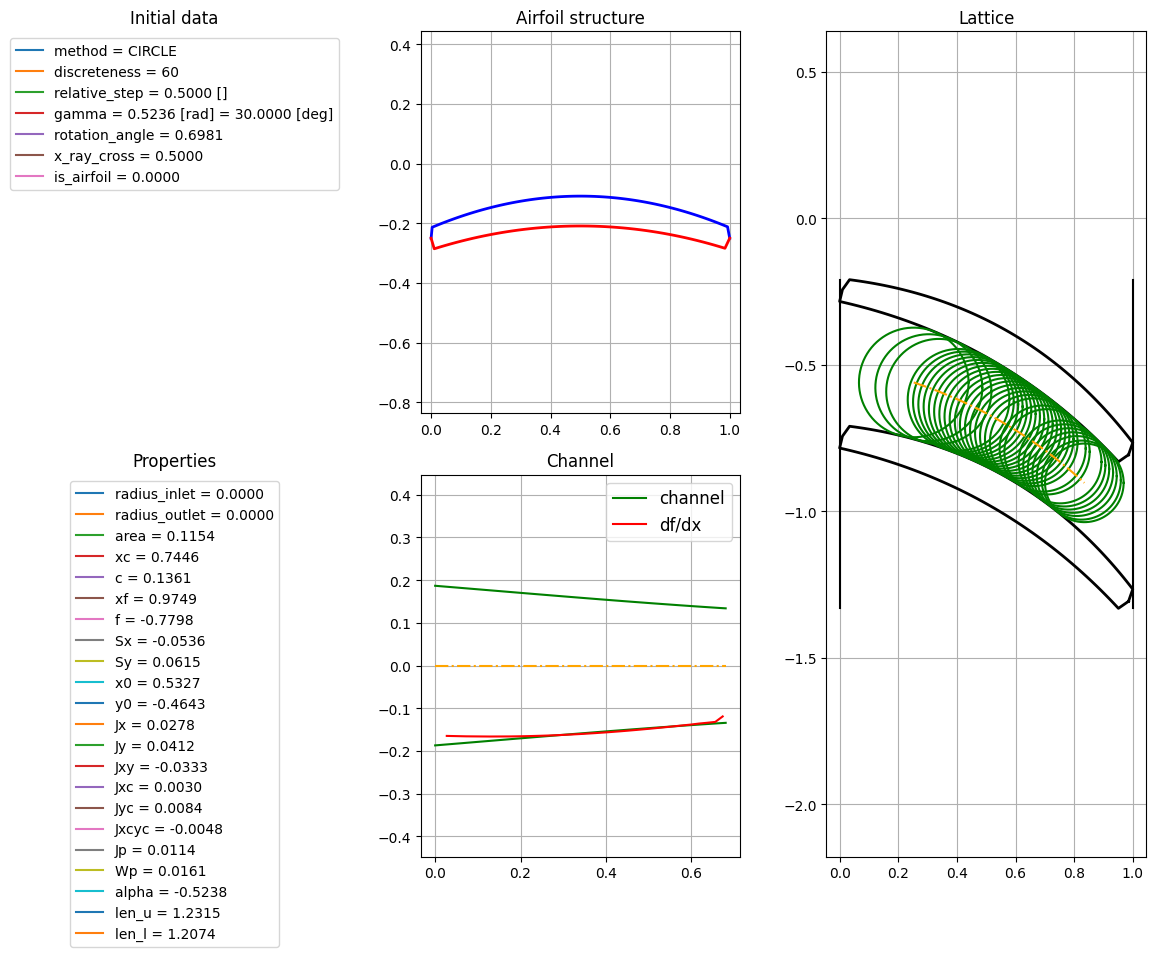

In [44]:
airfoil_circle_channel.show()

In [45]:
airfoil_circle_channel.properties

"properties" elapsed 0.0 seconds


{'radius_inlet': 0,
 'radius_outlet': 0,
 'area': 0.11536329815488904,
 'xc': np.float64(0.7445744574457446),
 'c': np.float64(0.13607313569494695),
 'xf': np.float64(0.9748974897489749),
 'f': np.float64(-0.7797793274504828),
 'Sx': -0.05356346539943007,
 'Sy': 0.061450750226561546,
 'x0': 0.5326715793445551,
 'y0': -0.4643024796977866,
 'Jx': 0.027822070689487506,
 'Jy': 0.041170491530169454,
 'Jxy': -0.03328645353695349,
 'Jxc': 0.0029524208833255315,
 'Jyc': 0.00843742335507914,
 'Jxcyc': -0.004754717827471642,
 'Jp': 0.01138984423840467,
 'Wp': np.float64(0.016118704322121064),
 'alpha': np.float64(-0.5238067544006616),
 'len_u': 1.2315005909296022,
 'len_l': 1.2073677370416107}

CFD: 100%|██████████| 125/125 [00:51<00:00,  2.44it/s]


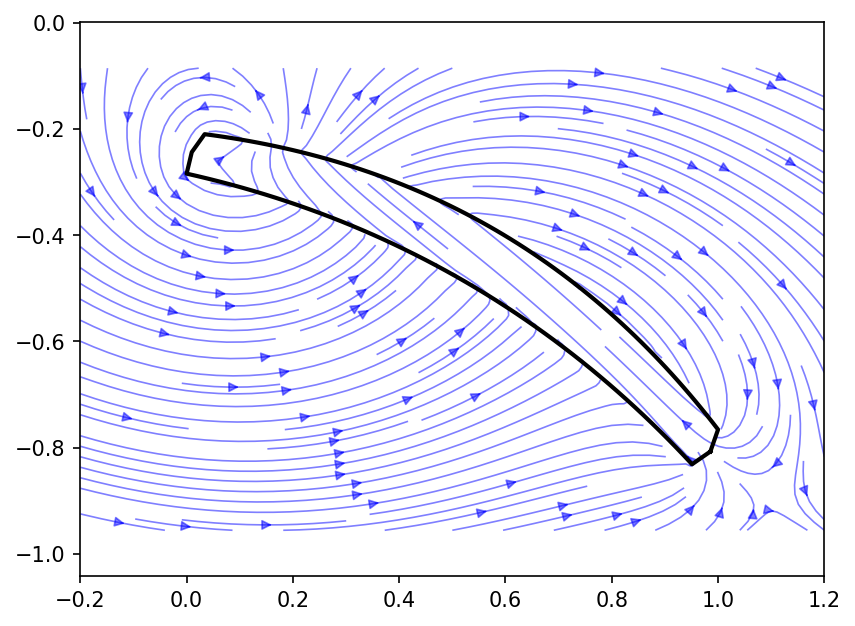

In [46]:
airfoil_circle_channel.cfd(15, -5)